In [150]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import statsmodels.api as sm
plt.style.use('seaborn-whitegrid')

C:\Users\redce\AppData\Local\Temp\ipykernel_25240\1006355162.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [151]:
df1 = pd.read_csv('../data/prices_round_4_day_1.csv', index_col='timestamp', delimiter=';')
df2 = pd.read_csv('../data/prices_round_4_day_2.csv', index_col='timestamp', delimiter=';')
df3 = pd.read_csv('../data/prices_round_4_day_3.csv', index_col='timestamp', delimiter=';')
df = pd.concat([df1,df2,df3], ignore_index=True).reset_index(drop=True)
df.head(10)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047.0,0.0
1,1,PINA_COLADAS,15013.0,34.0,15012.0,54.0,NaN,NaN,15016.0,88.0,NaN,NaN,NaN,NaN,15014.5,0.0
2,1,DIP,6999.0,237.0,NaN,NaN,NaN,NaN,7001.0,237.0,NaN,NaN,NaN,NaN,7000.0,0.0
3,1,BAGUETTE,11999.0,90.0,NaN,NaN,NaN,NaN,12001.0,90.0,NaN,NaN,NaN,NaN,12000.0,0.0
4,1,PICNIC_BASKET,73358.0,12.0,73357.0,27.0,NaN,NaN,73372.0,12.0,73373.0,27.0,NaN,NaN,73365.0,0.0
5,1,BERRIES,3916.0,12.0,3915.0,44.0,NaN,NaN,3923.0,12.0,3924.0,44.0,NaN,NaN,3919.5,0.0
6,1,DIVING_GEAR,98903.0,10.0,98902.0,12.0,NaN,NaN,98905.0,10.0,98906.0,12.0,NaN,NaN,98904.0,0.0
7,1,BANANAS,4871.0,9.0,4870.0,23.0,NaN,NaN,4877.0,23.0,NaN,NaN,NaN,NaN,4874.0,0.0
8,1,COCONUTS,8003.0,200.0,NaN,NaN,NaN,NaN,8006.0,200.0,NaN,NaN,NaN,NaN,8004.5,0.0
9,1,PEARLS,9998.0,9.0,9995.0,23.0,NaN,NaN,10005.0,23.0,NaN,NaN,NaN,NaN,10001.5,0.0


In [152]:
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']]
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']]

In [153]:
# class KalmanFilter(object):
#     def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

#         if(F is None or H is None):
#             raise ValueError("Set proper system dynamics.")

#         self.n = F.shape[1]
#         self.m = H.shape[1]

#         self.F = F
#         self.H = H
#         self.B = 0 if B is None else B
#         self.Q = np.eye(self.n) if Q is None else Q
#         self.R = np.eye(self.n) if R is None else R
#         self.P = np.eye(self.n) if P is None else P
#         self.x = np.zeros((self.n, 1)) if x0 is None else x0

#     def predict(self, u = 0):
#         self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
#         self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
#         return self.x

#     def update(self, z):
#         y = z - np.dot(self.H, self.x)
#         S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
#         K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
#         self.x = self.x + np.dot(K, y)
#         I = np.eye(self.n)
#         self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
#         	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

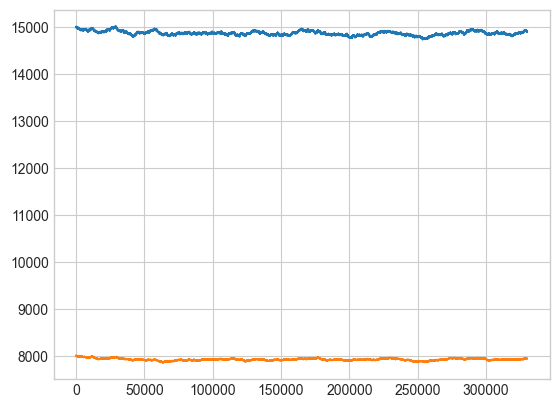

In [154]:
plt.plot(df_pina_coladas)
plt.plot(df_coconuts)

In [155]:
x = list(np.log(df_coconuts['mid_price']))
x_const = sm.add_constant(x)
y = list(np.log(df_pina_coladas['mid_price']))
linear_reg = sm.OLS(y,x_const)
results = linear_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 4.662e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:49:51   Log-Likelihood:             1.4571e+05
No. Observations:               30000   AIC:                        -2.914e+05
Df Residuals:                   29998   BIC:                        -2.914e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1411      0.035     61.914      0.000       2.073       2.209
x1             0.8317      0.004    215.908      0.000       0.824       0.839
==============================================================================
Omnibus:                     1541.079   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1845.628
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                       3.519   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
beta = results.params[1]
alpha = results.params[0]

In [157]:
y_pred = np.log(df_coconuts['mid_price'])*beta + alpha

C:\Users\redce\AppData\Local\Temp\ipykernel_25240\558197521.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([str(p) for p in df_coconuts['mid_price'].index])


Text(0, 0.5, 'pina_coladas')

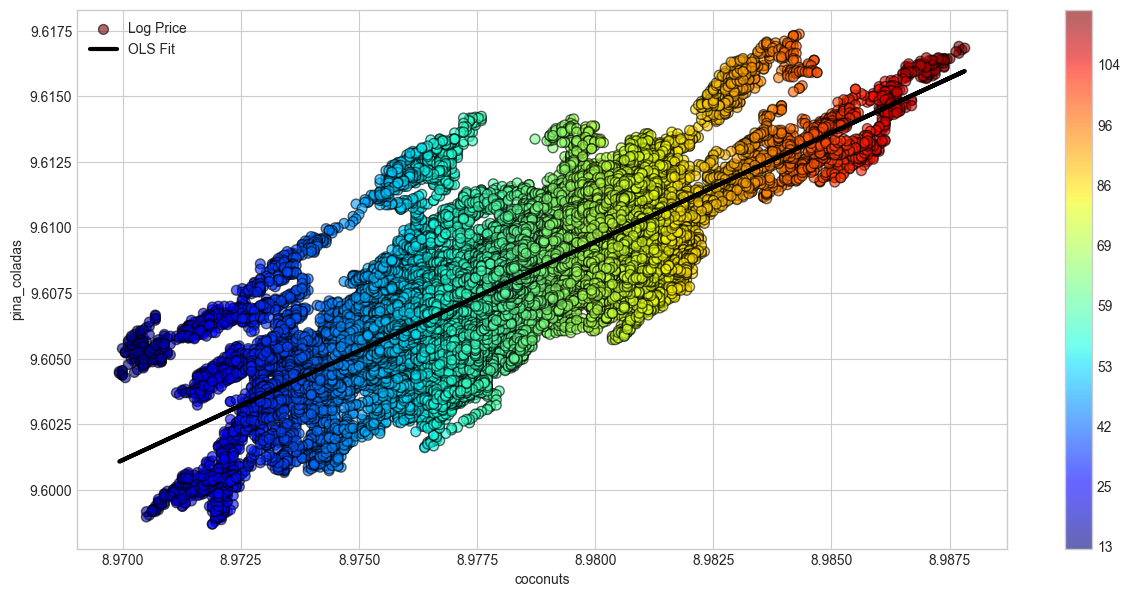

In [158]:
plt.figure(figsize =(15,7))
cm = plt.get_cmap('jet')
sc = plt.scatter(np.log(df_coconuts['mid_price']), np.log(df_pina_coladas['mid_price']), s=50, c=x, cmap=cm, marker='o',
                 alpha=0.6,label='Log Price',edgecolor='k')
plt.plot(x, y_pred, '-',c='black',linewidth=3, label='OLS Fit')
plt.legend()
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p) for p in df_coconuts['mid_price'].index])
plt.xlabel('coconuts')
plt.ylabel('pina_coladas')

Text(0, 0.5, 'spread')

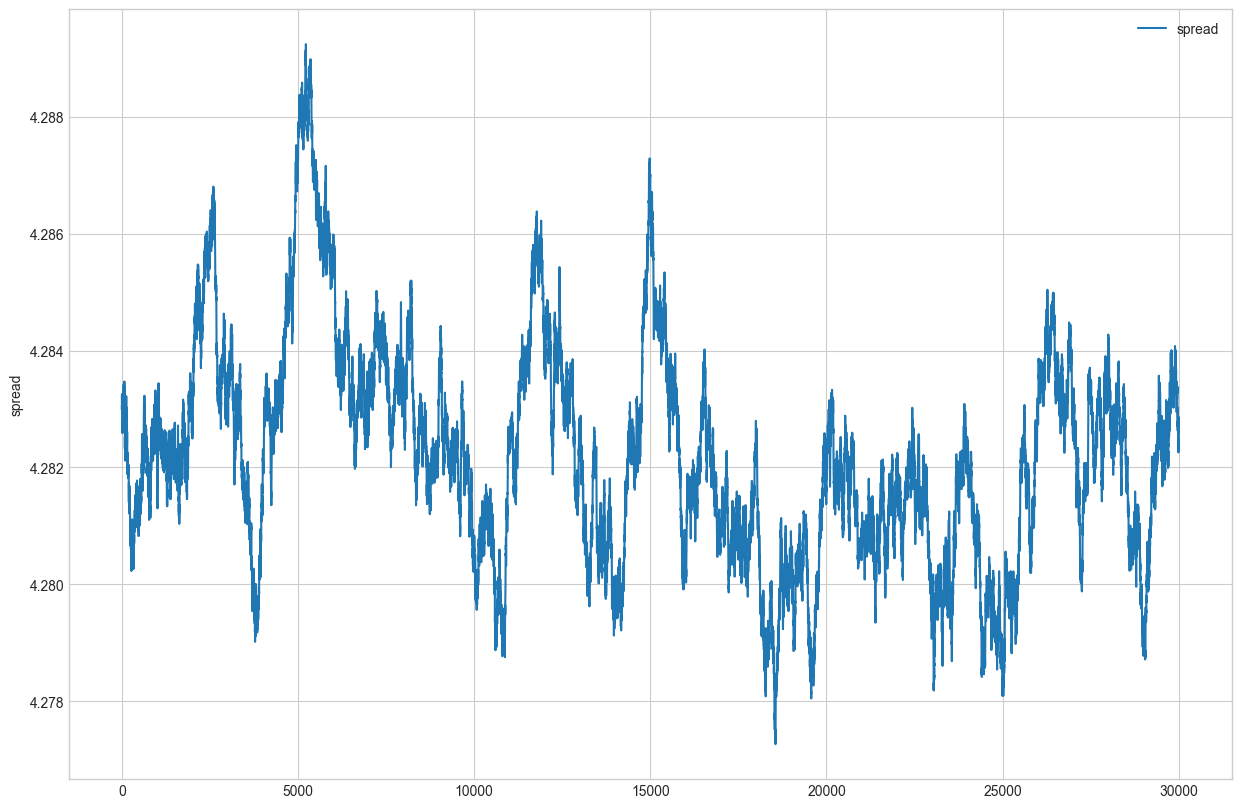

In [159]:
df_pairs = pd.DataFrame(np.log(df_pina_coladas['mid_price']).to_numpy() - (np.log(df_coconuts['mid_price'])*beta-alpha).to_numpy())
# print(np.log(df_pina_coladas['mid_price']) - np.log(df_coconuts['mid_price'])*beta-alpha)
# print((np.log(df_coconuts['mid_price'])*beta-alpha).shape)
df_pairs.columns = ['spread']
df_pairs.plot(figsize =(15,10))
# plt.plot(df_ols)
plt.ylabel('spread')

In [160]:
# check if the spread is stationary 
adf = sm.tsa.stattools.adfuller(df_pairs['spread'], maxlag=1)
print('ADF test statistic: %.02f' % adf[0])
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
print('p-value: %.03f' % adf[1])

ADF test statistic: -4.64
	1%: -3.431
	5%: -2.862
	10%: -2.567
p-value: 0.000


In [161]:
df_pairs['mean'] = df_pairs['spread'].mean()
df_pairs['upper'] = df_pairs['mean'] + 1.96*df_pairs['spread'].std()
df_pairs['lower'] = df_pairs['mean'] - 1.96*df_pairs['spread'].std()

<Axes: >

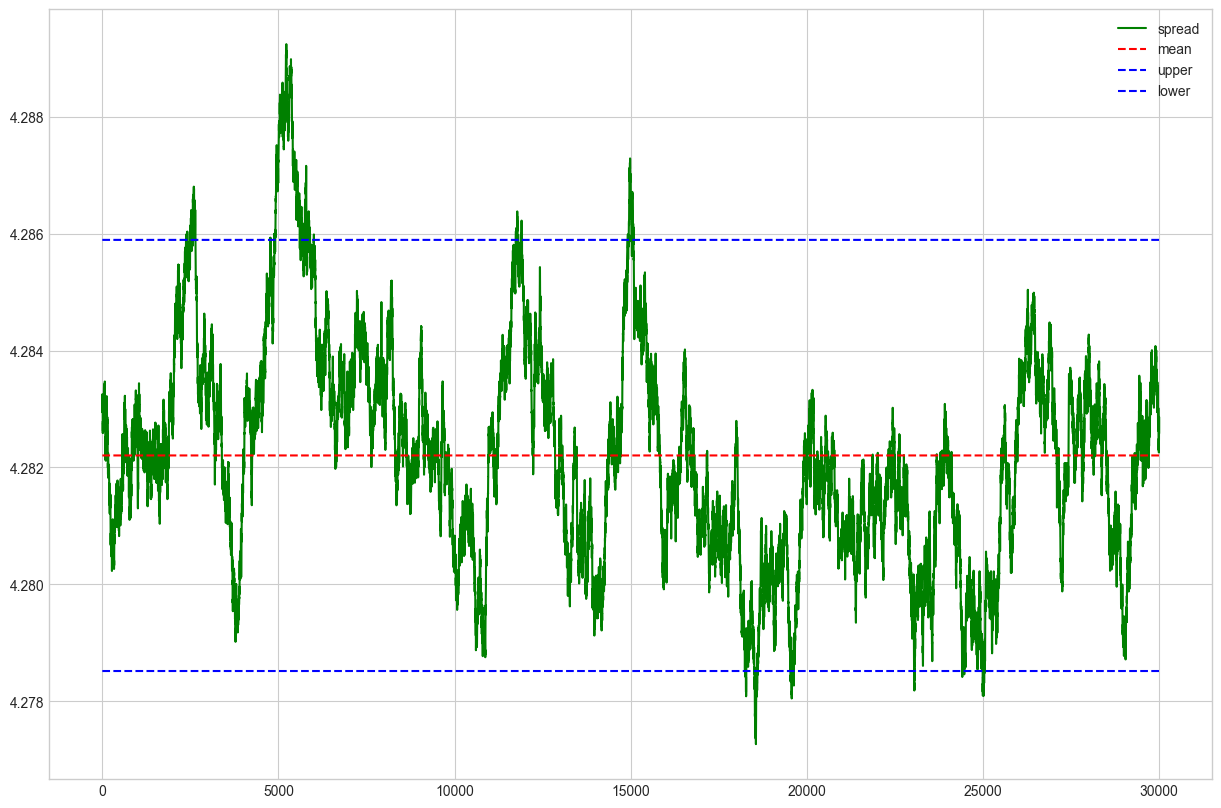

In [162]:
df_pairs.plot(figsize =(15,10),style=['g', '--r', '--b', '--b'])

<Axes: >

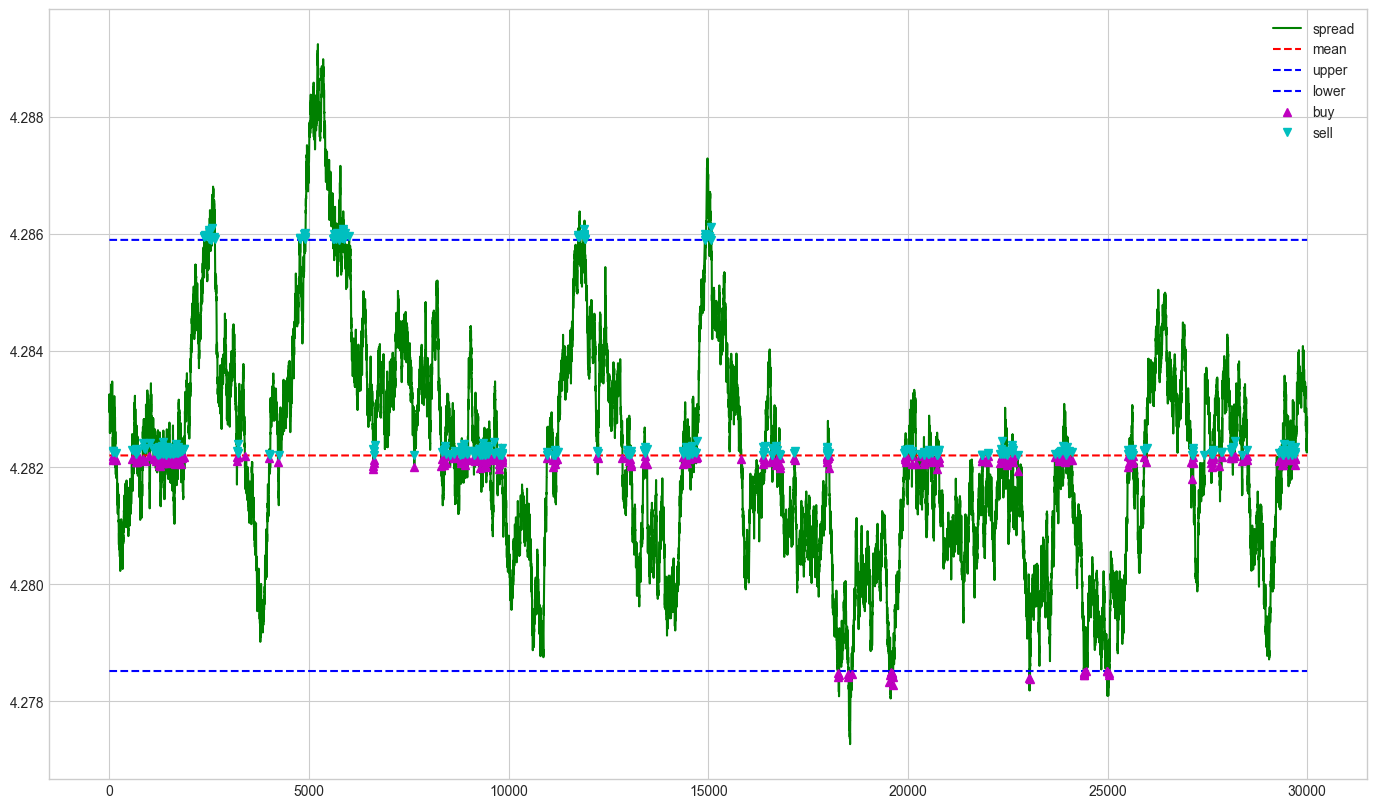

In [163]:
df_pairs['buy'] = df_pairs['spread'][((df_pairs['spread'] < df_pairs['lower']) & (df_pairs['spread'].shift(1) > df_pairs['lower']) | 
                          (df_pairs['spread'] <  df_pairs['mean']) & (df_pairs['spread'].shift(1) >  df_pairs['mean']))]

df_pairs['sell'] = df_pairs['spread'][((df_pairs['spread'] > df_pairs['upper']) & (df_pairs['spread'].shift(1) < df_pairs['upper']) | 
                           (df_pairs['spread'] >  df_pairs['mean']) & (df_pairs['spread'].shift(1) <  df_pairs['mean']))]
df_pairs.plot(figsize =(17,10), style=['g', '--r', '--b', '--b', 'm^','cv'])

# Kalman Filter

In [164]:
obs_mat = sm.add_constant(np.log(df_coconuts['mid_price']).to_numpy(), prepend=False)[:, np.newaxis]
trans_cov = 1e-5 / (1 - 1e-5) * np.eye(2)

In [165]:
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, 
                  initial_state_mean=np.ones(2),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=0.5,
                  transition_covariance=0.000001 * np.eye(2))
# kf = KalmanFilter()

Text(0, 0.5, 'intercept')

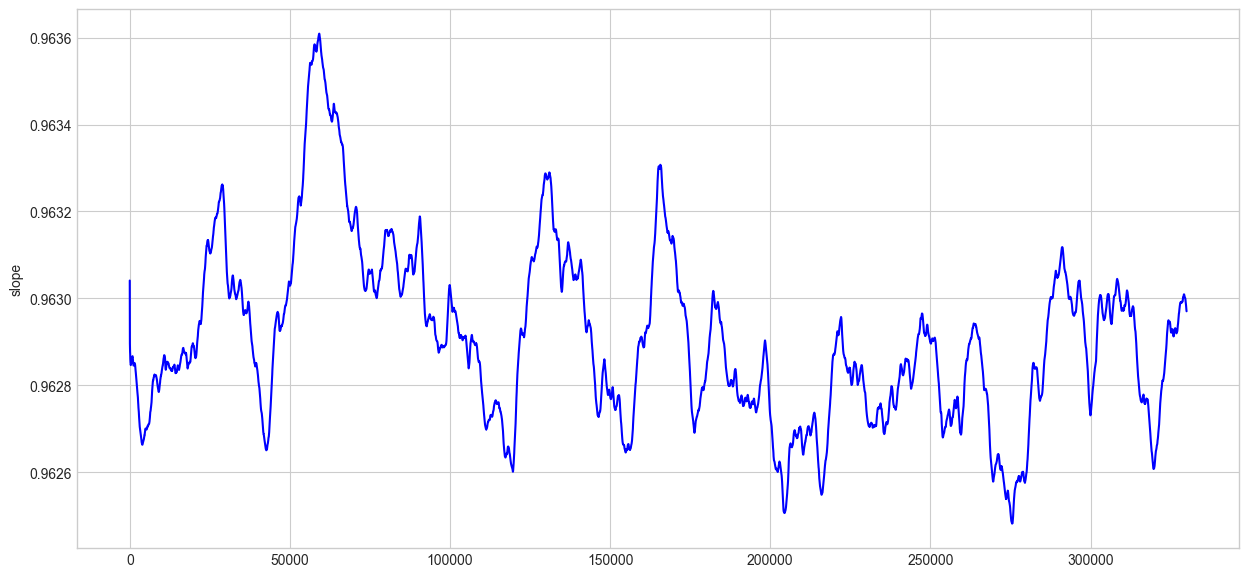

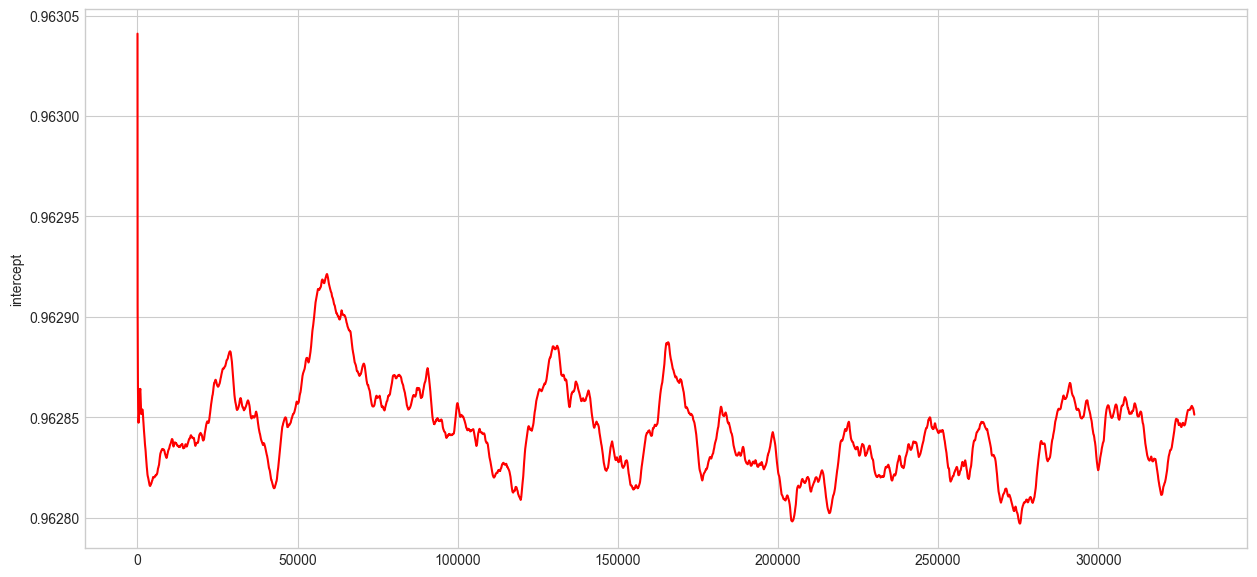

In [166]:
state_means, state_covs = kf.filter(np.log(df_pina_coladas['mid_price']).to_numpy())
slope=state_means[:, 0] 
intercept=state_means[:, 1]
plt.figure(figsize =(15,7))
plt.plot(df_pina_coladas['mid_price'].index, slope, c='b')
plt.ylabel('slope')
plt.figure(figsize =(15,7))
plt.plot(df_coconuts['mid_price'].index,intercept,c='r')
plt.ylabel('intercept')

C:\Users\redce\AppData\Local\Temp\ipykernel_25240\3095316681.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([str(p) for p in df_coconuts['mid_price'].index])


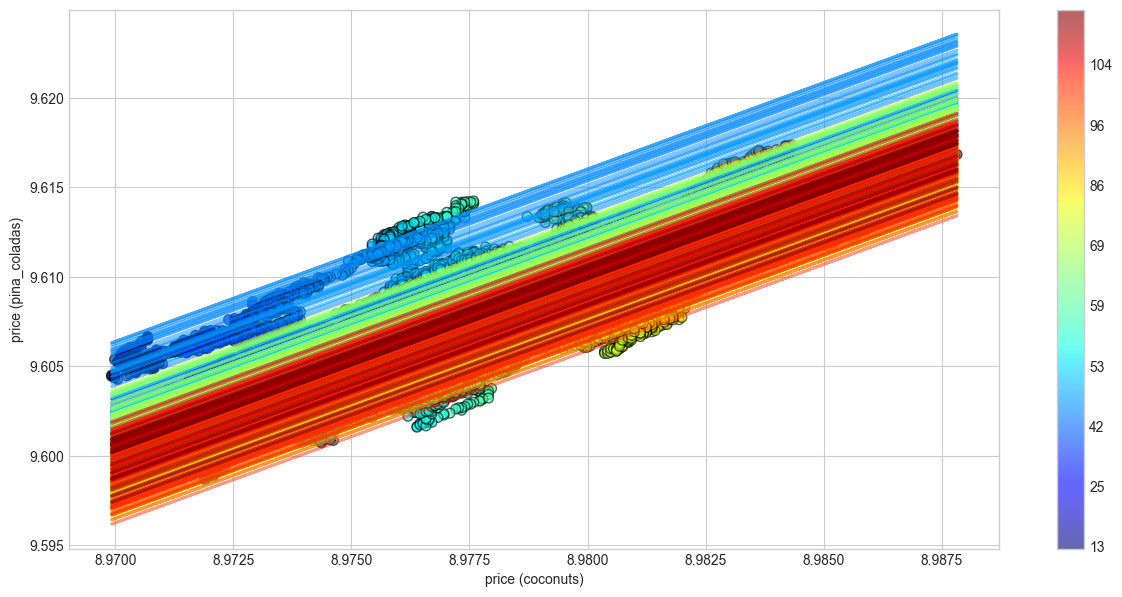

In [167]:
# visualize the correlation between assest prices over time
plt.figure(figsize =(15,7))
cm = plt.get_cmap('jet')
sc = plt.scatter(np.log(df_coconuts['mid_price']), np.log(df_pina_coladas['mid_price']), s=50, c=x, cmap=cm, marker='o',
                 alpha=0.6,label='Price',edgecolor='k')
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p) for p in df_coconuts['mid_price'].index])
plt.xlabel("price (coconuts)")
plt.ylabel("price (pina_coladas)")

# add regression lines
step = 50 # pick slope and intercept every 50 days
colors_l = np.linspace(0.1, 1, len(state_means[::step]))
for i, b in enumerate(state_means[::step]):
    plt.plot(np.log(df_coconuts['mid_price']), b[0] *np.log(df_coconuts['mid_price']) + b[1], alpha=.5, lw=2, c=cm(colors_l[i]))

In [168]:
kl_spread = np.log(df_pina_coladas['mid_price']).to_numpy() - np.log(df_coconuts['mid_price']).to_numpy() * state_means[:,0] - state_means[:,1]
df_pairs['kl_spread'] = kl_spread

C:\Users\redce\AppData\Local\Temp\ipykernel_25240\1524712720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = df_pairs.drop(['buy','sell'],1)


<Axes: >

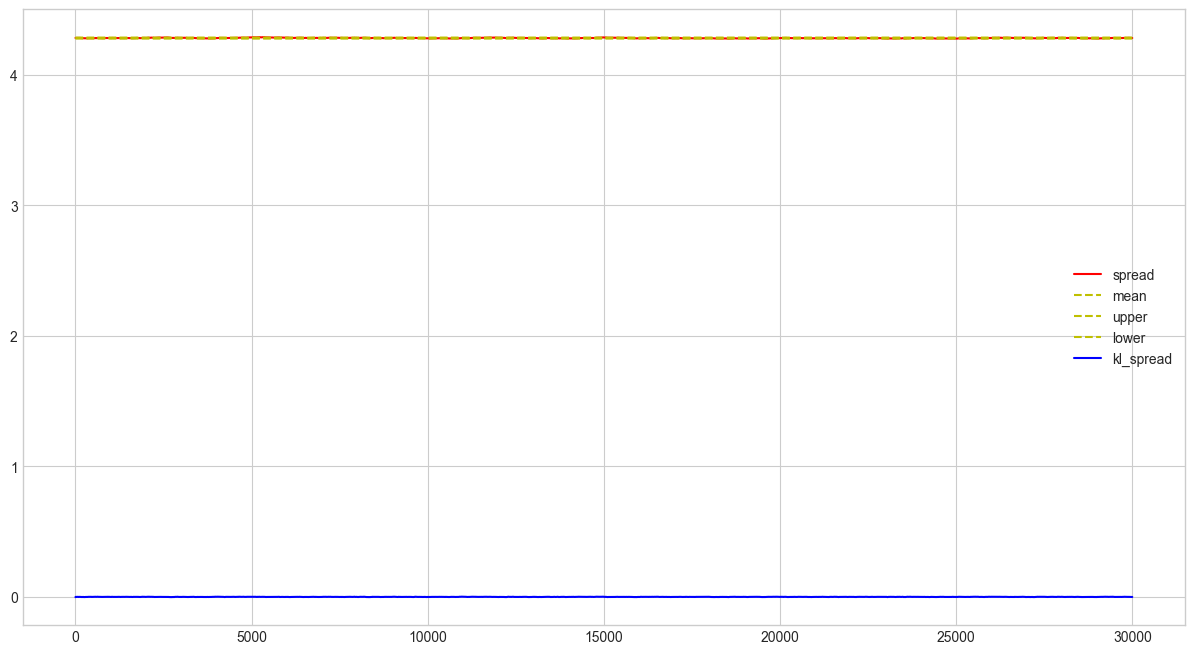

In [169]:
new_df = df_pairs.drop(['buy','sell'],1)
new_df.plot(figsize =(15,8),style=['r','--y', '--y', '--y','b'])